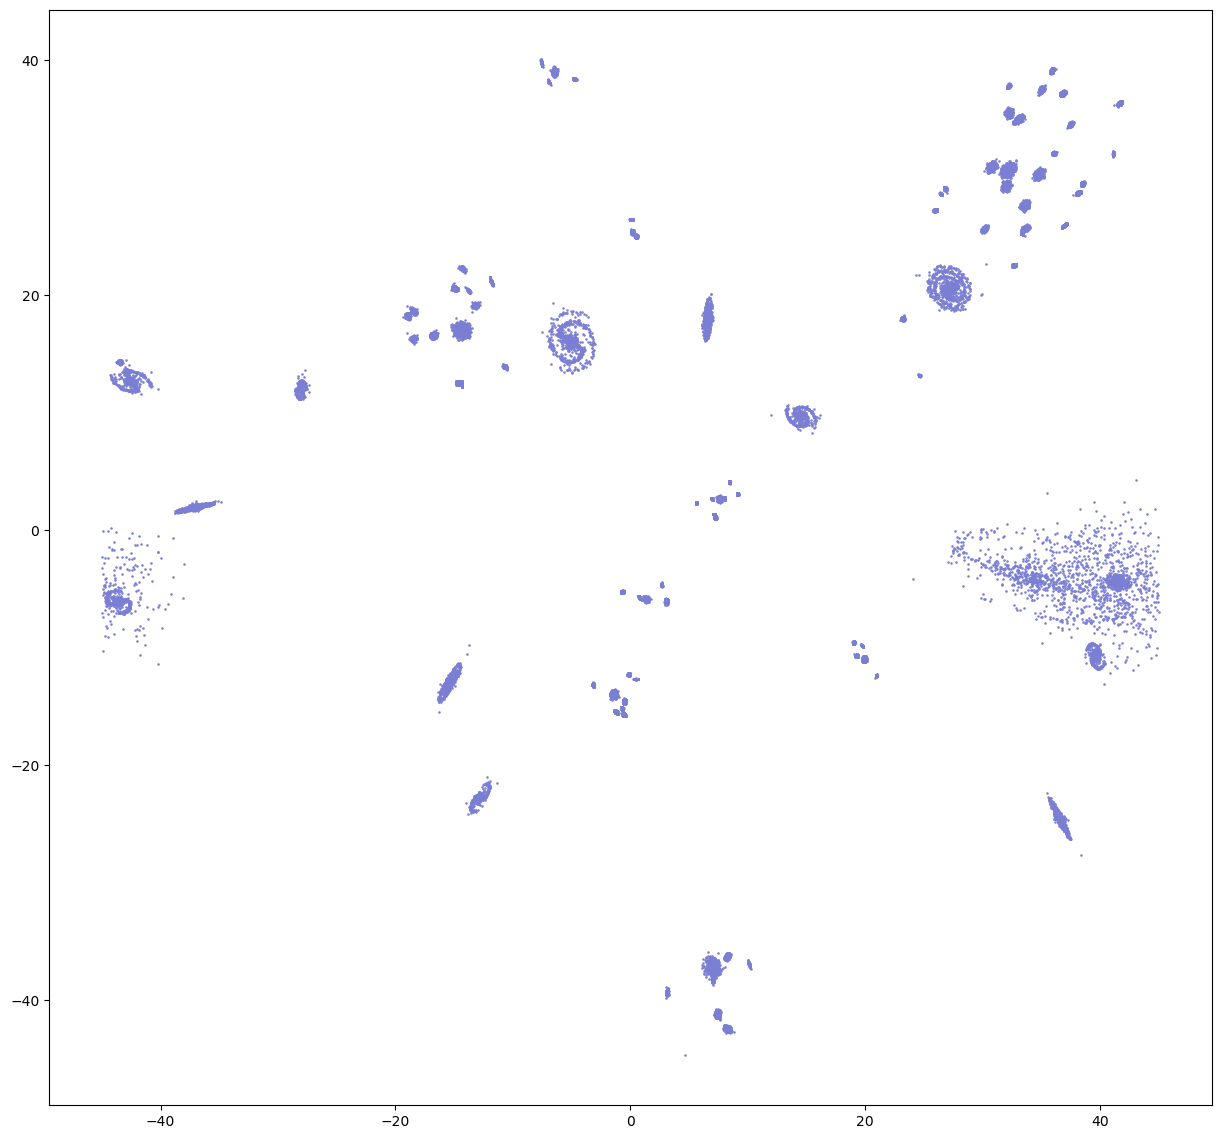

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

datapath = 'universe_8/'
stardata = pd.read_csv(datapath + '/combined_stars.csv')  

equats = stardata['X']   
polars = stardata['Y']    
parallax = stardata['Parallax']    

indexes = [i for i, x in enumerate(parallax) if x <= 0.007] 
equats = [equats[i] for i in indexes]  
polars = [polars[i] for i in indexes]

fig = plt.figure(figsize=(15, 15))  
ax = fig.add_subplot(1, 1, 1)    
ax.scatter(equats, polars, s=0.7, c='#7b7fd4')  

#ax.set_facecolor('#6D6875')   
ax.set_aspect(1)    
plt.show()   

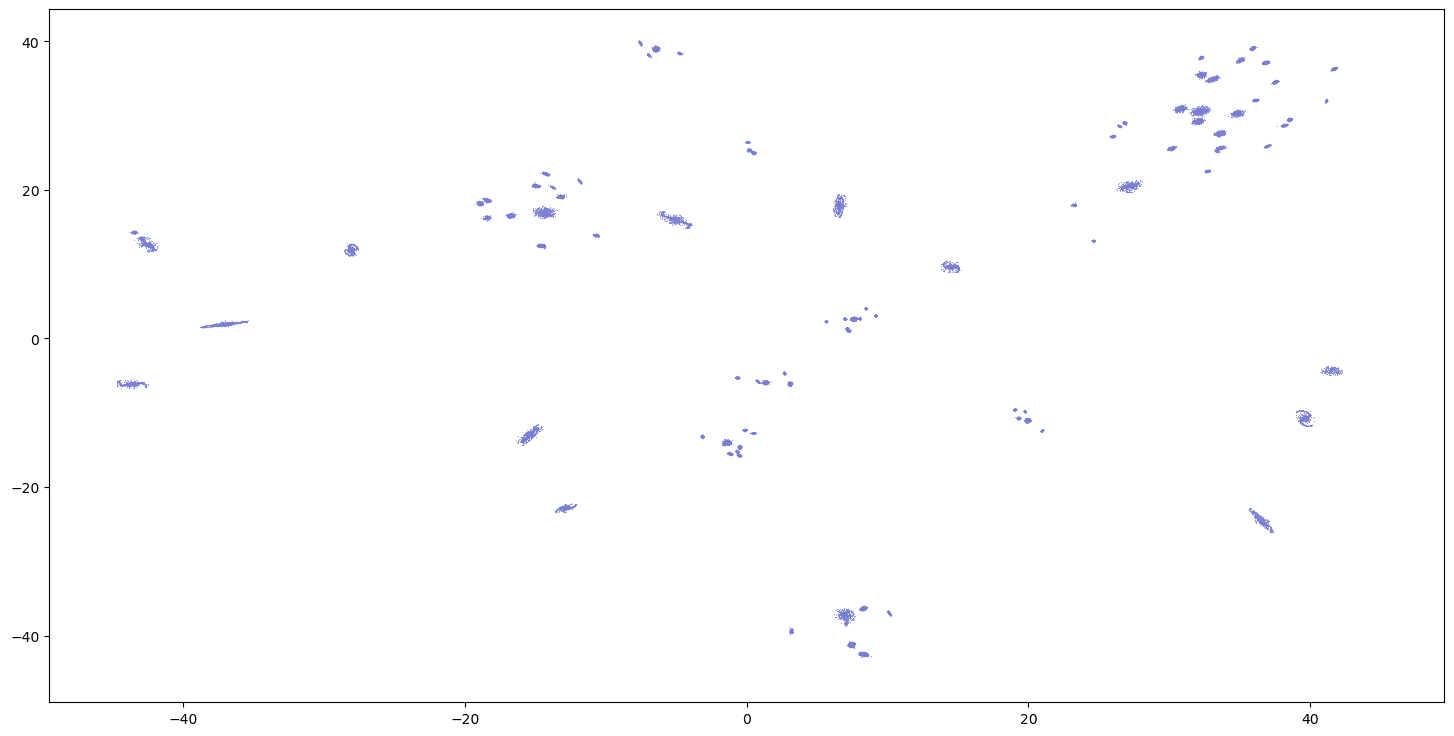

In [2]:
from sklearn import cluster
import numpy as np

coords = np.ndarray((len(equats), 2)) 
for i, equat in enumerate(equats):
    coords[i] = [equat, polars[i]] 

clustering = cluster.DBSCAN(eps=0.3, min_samples=40, n_jobs=-1).fit(coords)

labels = clustering.labels_ 

fig, ax = plt.subplots(figsize=(18, 9))   

for clust in range(0, max(labels) + 1):
    
    Xk = coords[labels == clust] 
    ax.scatter(Xk[:, 0], Xk[:, 1], alpha=0.8, color= '#7b7fd4', s=0.7, linewidths=0)
    
ax.scatter(coords[labels == -1, 0], coords[labels == -1, 1], c="w", alpha=0.3, s=0.02, linewidths=0) 


#ax.set_facecolor('#536b89')
plt.show()

In [3]:
import os
directory = os.path.abspath("") + f"\\{datapath}"
newdir = directory + "\\Star Clusters"
if not os.path.exists(newdir):
    os.makedirs(newdir)

for clust in range(0, max(labels) + 1):
    indices = np.where(labels == clust)  
    data = stardata.iloc[indices] 
    
    Xk = coords[labels == clust] 
    xcenter = np.mean(Xk[:, 0]); ycenter = np.mean(Xk[:, 1]) 
    
    clustername = 'Cheese'+ str(xcenter) +'Pizza'+ str(ycenter)+'Galaxy' 
    data.to_csv(datapath + f'/Star Clusters/{clustername}.csv', index=None, sep=' ')    

In [4]:
positions = np.ndarray((max(labels), 3))
print(positions)
names = np.ndarray((max(labels)), dtype=object)

for clust in range(0, max(labels)):
    indices = np.where(labels == clust)  
    data = stardata.iloc[indices]
    
    Xk = coords[labels == clust] 
    xcenter = np.mean(Xk[:, 0]); ycenter = np.mean(Xk[:, 1])
    meanvel = np.mean(data['RadialVelocity']) 
    positions[clust] = [xcenter, ycenter, meanvel]
    clustername = 'Cheese'+ str(xcenter) +'Pizza'+ str(ycenter)+'Galaxy' 
    names[clust] = clustername

[[6.95170200e-310 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 4.94065646e-324]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 1.03896808e-311]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 1.42173718e-312]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 2.16939877e-317]
 [0.00000000e+000 0.00000000e+0

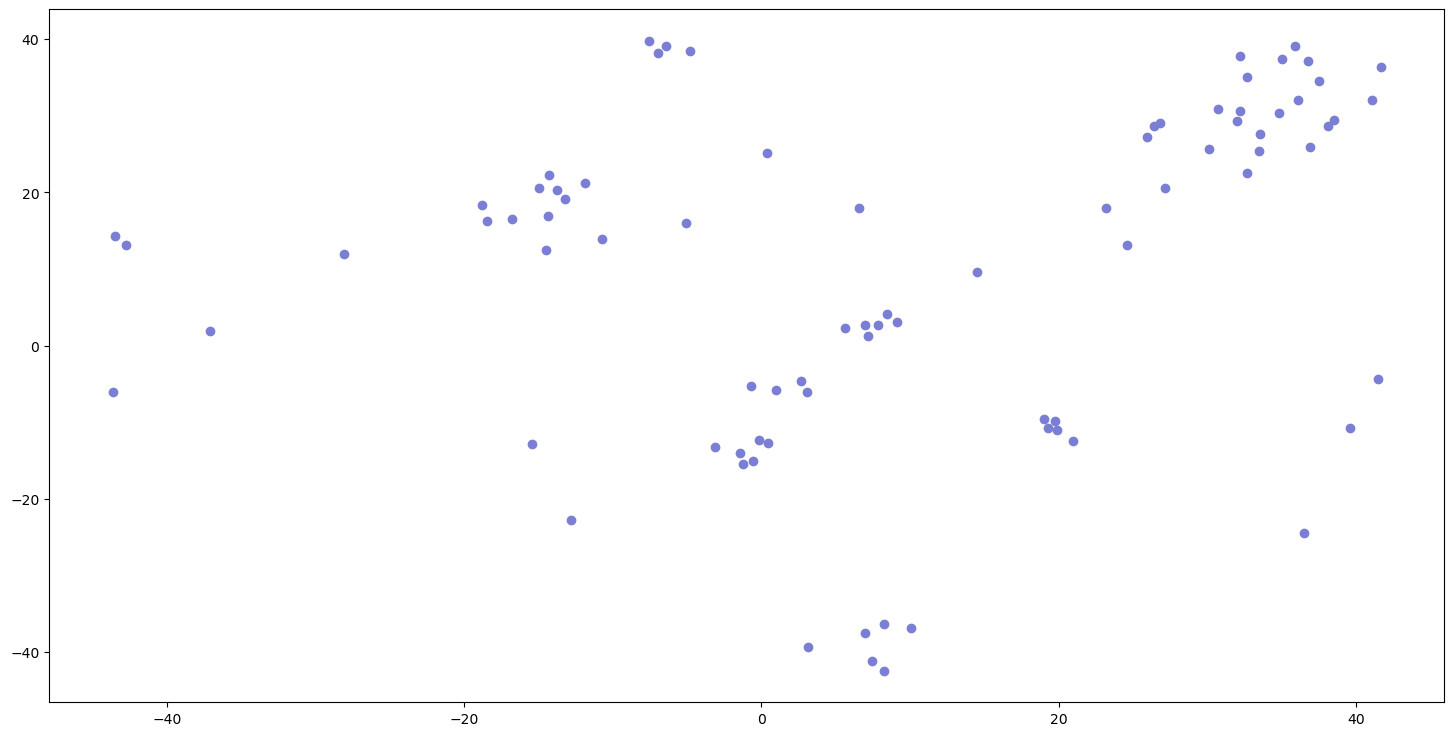

In [5]:
fig, ax = plt.subplots(figsize=(18, 9))
ax.scatter(positions[:, 0], positions[:, 1], c='#7b7fd4')

#ax.set_facecolor('#536b89')


Text(0.5, 0.5, 'Radial Velocity (km/s)')

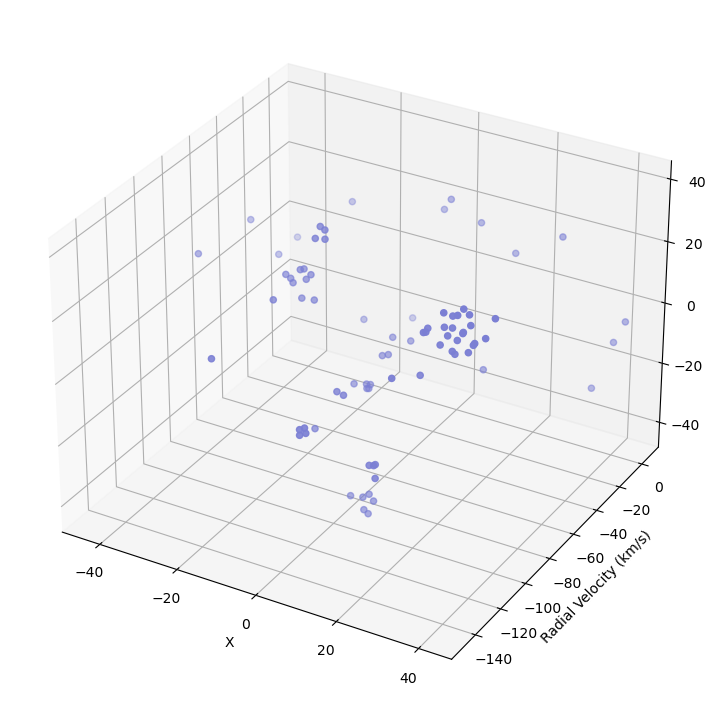

In [7]:
fig = plt.figure(figsize=(18, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(positions[:, 0], positions[:, 2], positions[:, 1], c = "#7b7fd4")
ax.set_xlabel("X"); ax.set_zlabel("Y"); ax.set_ylabel("Radial Velocity (km/s)")

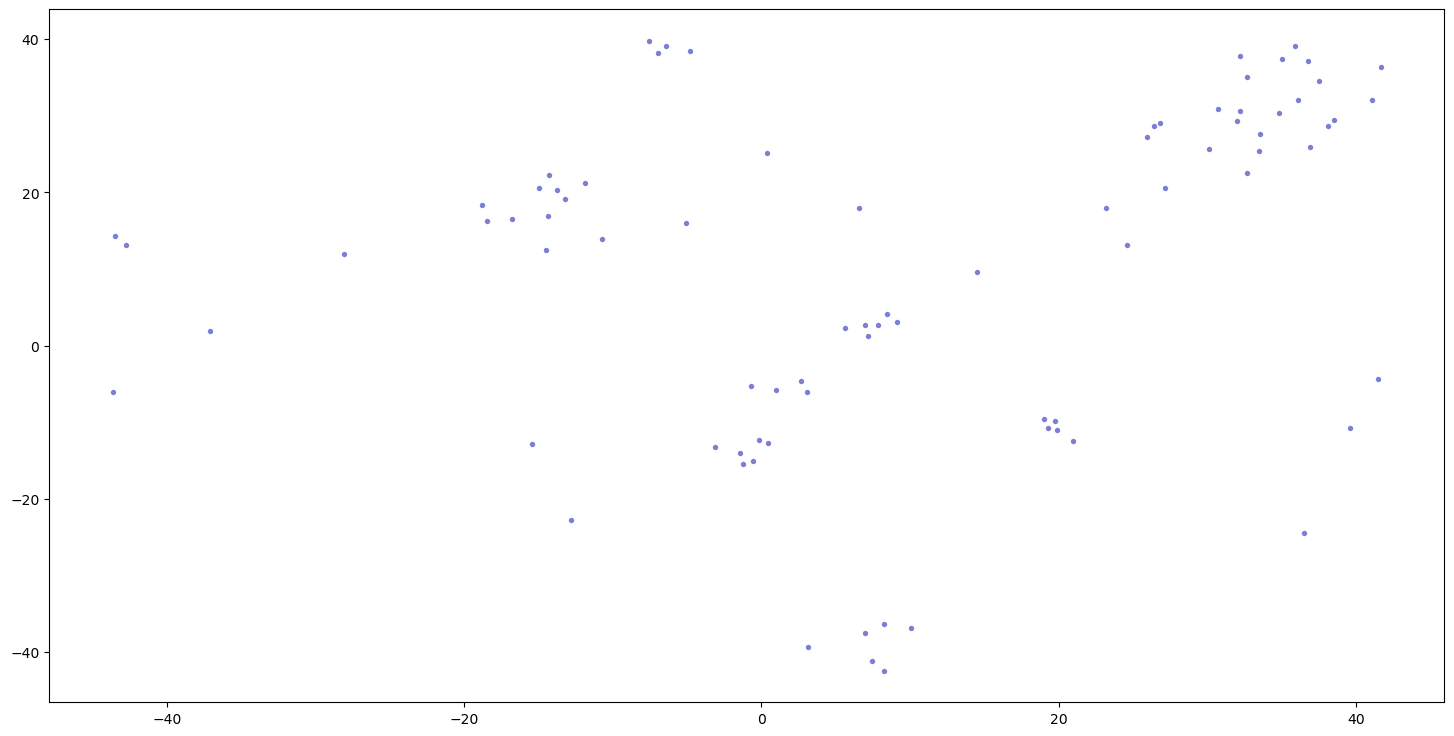

In [11]:
coords = np.ndarray((len(equats), 2)) 
for i, equat in enumerate(equats):
    coords[i] = [equat, polars[i]] 


clustering = cluster.DBSCAN(eps=0.3, min_samples=40, n_jobs=-1).fit(positions)

labels = clustering.labels_ 

fig, ax = plt.subplots(figsize=(18, 9))

for clust in range(0, max(labels) + 1):
    Xk = positions[labels == clust]
    ax.scatter(Xk[:, 0], Xk[:, 1], alpha=0.8, c="#536b89", s=4, linewidths=0)
    
ax.scatter(positions[labels == -1, 0], positions[labels == -1, 1], s=15, c='#7b7fd4', linewidths=0)

#ax.set_facecolor('#536b89')
#fig.savefig('hdbscanClose.png', dpi=1500)
plt.show()



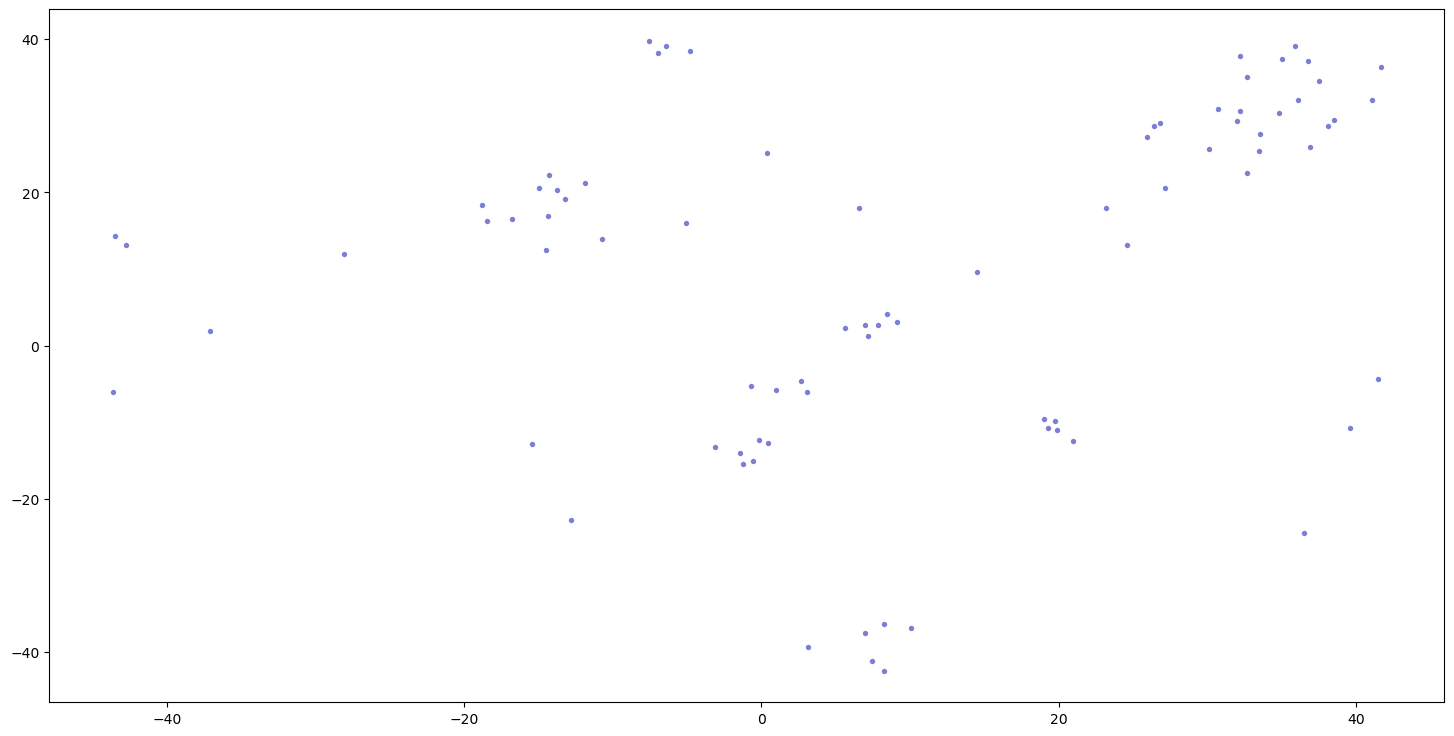

In [12]:
fig, ax = plt.subplots(figsize=(18, 9))
labels = clustering.labels_ 


for clust in range(0, labels.max() + 1):
    print(positions)
    
    
    Xk = positions[labels == clust]
    
    
    
    
    
    ax.scatter(Xk[:, 0], Xk[:, 1], alpha=0.8, c='blue', s=4, linewidths=0)
    
ax.scatter(positions[labels == -1, 0], positions[labels == -1, 1], s=15, c='#7b7fd4', linewidths=0)
#ax.set_facecolor('#536b89')

plt.show()

In [13]:
newdir = directory + "\\Close Galaxy Clusters"
if not os.path.exists(newdir):
    os.makedirs(newdir)
    
for clust in range(0, max(labels) + 1):
    Xk = positions[labels == clust] 
    xcenter = np.mean(Xk[:, 0]); ycenter = np.mean(Xk[:, 1]) 
    
    
    clustername = 'Cheese'+ str(xcenter) +'Pizza'+ str(ycenter)+'Galaxy'  
    galaxnames = names[labels == clust] 
    with open(datapath + f'/Close Galaxy Clusters/{clustername}.csv', 'w') as file: 
        for name in galaxnames: 
            file.write(str(name)+'\n') 

In [14]:
import glob 
k = pd.concat([pd.read_csv(file) for file in glob.glob(r'universe_8/*/Distant_Galaxy_Data.csv')])
k.to_csv("Distant_Galaxies_Combined.csv")

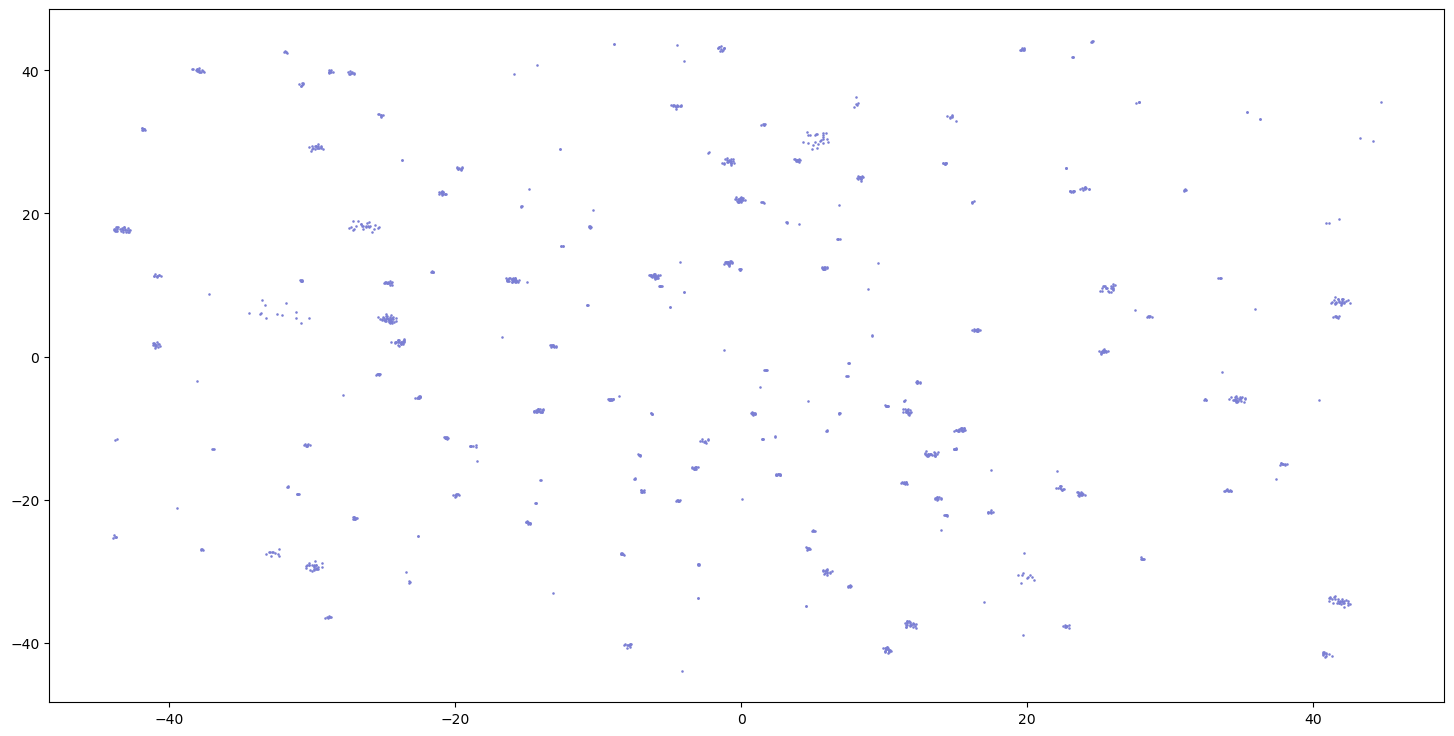

In [16]:
distantdata = pd.read_csv('Distant_Galaxies_Combined.csv')

distantequats = distantdata['X']   
distantpolars = distantdata['Y']   

fig, ax = plt.subplots(figsize=(18, 9))
ax.scatter(distantequats, distantpolars, s=0.7, c='#7b7fd4')
#ax.set_facecolor('#536b89')
plt.show()  

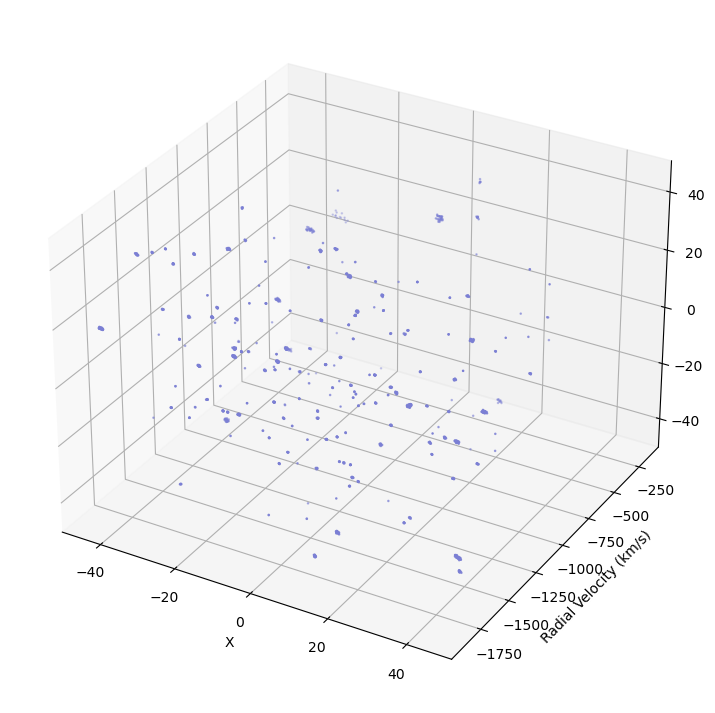

In [17]:
distantvels = distantdata['RadialVelocity']  # import the velocity data

fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(projection='3d')
ax.scatter(distantequats, distantvels, distantpolars, s=0.7, c = "#7b7fd4")

ax.set_xlabel("X"); ax.set_zlabel("Y"); ax.set_ylabel("Radial Velocity (km/s)");

In [19]:
distantcoords = np.ndarray((max(distantequats), 3))  
for i, equat in enumerate(distantequats):
    distantcoords[i] = [equat, distantpolars[i], distantvels[i]]


distantclusters = cluster.DBSCAN.fit(positions)

fig, ax = plt.subplots(figsize=(18, 9))

for clust in range(0, max(labels) + 1):
    Xk = positions[labels == clust]
    ax.scatter(Xk[:, 0], Xk[:, 1], alpha=0.8, c="#7b7fd4", s=4, linewidths=0)
    
ax.scatter(positions[labels == -1, 0], positions[labels == -1, 1], s=10, c='#7b7fd4', linewidths=0)

#ax.set_facecolor('#536b89')
#fig.savefig('hdbscanClose.png', dpi=1500)
plt.show()



TypeError: 'float' object cannot be interpreted as an integer

In [160]:
distantcoords = np.ndarray((len(distantequats), 3))  

for i, equat in enumerate(distantequats):
    distantcoords[i] = [equat, distantpolars[i], distantvels[i]]
print(distantcoords)

distantclusters = cluster.DBSCAN.fit(distantcoords)
labels = distantclusters.labels_

[[   -8.2964   -27.6046 -1493.96  ]
 [   -8.2302   -27.7291 -1493.93  ]
 [   -8.3449   -27.6217 -1494.05  ]
 ...
 [  -27.099     17.8371  -637.55  ]
 [  -26.0658    18.0862  -637.31  ]
 [  -26.536     18.2018  -637.11  ]]


TypeError: fit() missing 1 required positional argument: 'X'

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1441 but corresponding boolean dimension is 82

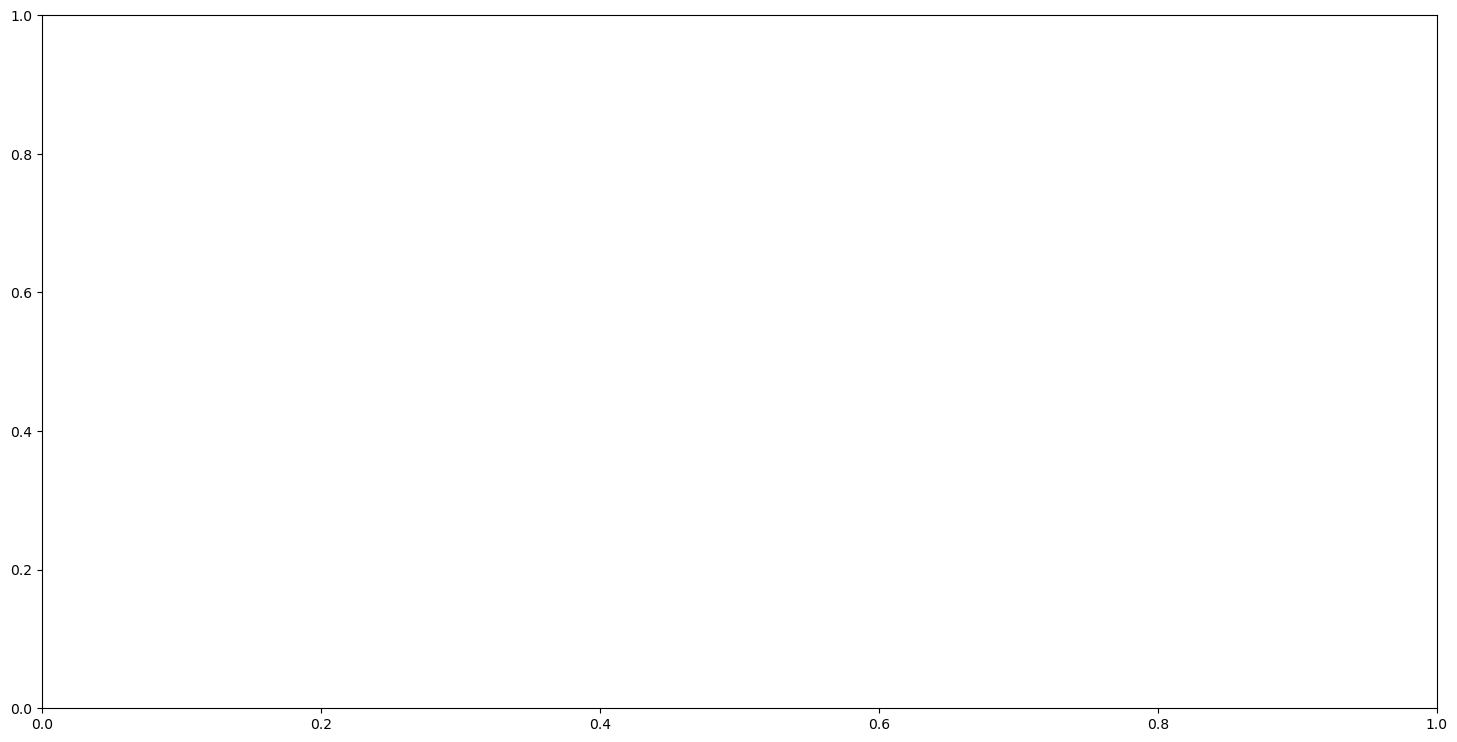

In [144]:
fig, ax = plt.subplots(figsize=(18, 9))

for clust in range(0, max(labels) + 1):
    Xk = distantcoords[labels == clust]
    ax.scatter(Xk[:, 0], Xk[:, 1], alpha=0.8, c="#536b89", s=0.5, linewidths=0)
    
ax.scatter(distantcoords[labels == -1, 0], distantcoords[labels == -1, 1], s=0.5, c='w', linewidths=0)
ax.set_ylim(0, 180); ax.invert_yaxis()
ax.set_xlim(0, 360)
ax.set_facecolor('k')
fig.savefig('hdbscanDistant.png', dpi=1500)
plt.show()

In [ ]:
newdir = directory + "\\Distant Galaxy Clusters"

if not os.path.exists(newdir):
    os.makedirs(newdir)
clusterCoords = np.ndarray((max(labels) + 1, 2))

for clust in range(0, max(labels) + 1):
    indices = np.where(labels == clust)  # gets the indices of this cluster's galaxies with respect to distantdata
    data = distantdata.iloc[indices] # find the galaxies corresponding to the found indices
    
    Xk = distantcoords[labels == clust] # get the positions of all of the stars in the cluster
    xcenter = np.mean(Xk[:, 0]); ycenter = np.mean(Xk[:, 1]) # rough center points of each cluster
    
    clusterCoords[clust] = (xcenter, ycenter)
    
    # now, I want to name the clusters like "DC-X{equat}-Y{polar}-N{population}":
    clustername = 'Cheese'+xcenter + 'Pizza'+ycenter+'Galaxy' # generates cluster name
    # finally, write the data to a file defined by clustername
    data.to_csv(datapath + f'/Distant Galaxy Clusters/{clustername}.csv', index=None, sep=' ')    